In [ ]:
!pip install missingno
!pip install pydot

You should consider upgrading via the '/opt/venv/bin/python -m pip install --upgrade pip' command.
You should consider upgrading via the '/opt/venv/bin/python -m pip install --upgrade pip' command.


In [ ]:
import pandas as pd
from math import sqrt
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno 
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import RobustScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import export_graphviz
import pydot
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.losses import CategoricalCrossentropy
from sklearn.neural_network import MLPClassifier
import numpy as np


In [ ]:
cc=pd.read_csv("UCI_Credit_Card.csv")
cc.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [ ]:
print("number of rows :",len(cc))
print("number of columns :",len(cc.columns))
print("number of rows and columns :",cc.shape)
print("number of elements :",cc.size)

number of rows : 30000
number of columns : 25
number of rows and columns : (30000, 25)
number of elements : 750000


In [ ]:
cc.isnull().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default.payment.next.month    0
dtype: int64

<AxesSubplot:>

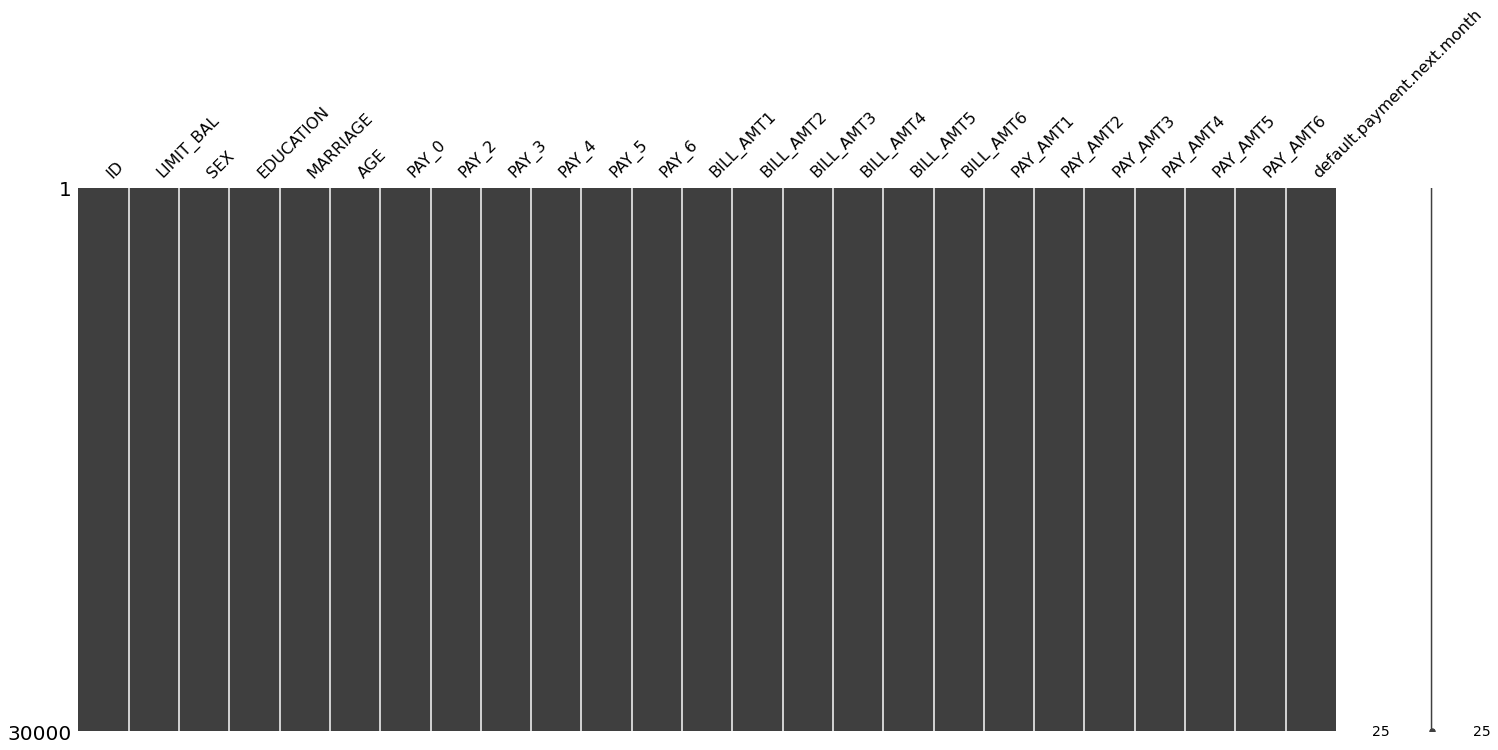

In [ ]:
msno.matrix(cc)


There are 25 variables:

ID: ID of each client
LIMIT_BAL: Amount of given credit in NT dollars (includes individual and family/supplementary credit
SEX: Gender (1=male, 2=female)
EDUCATION: (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)
MARRIAGE: Marital status (1=married, 2=single, 3=others)
AGE: Age in years
PAY_0: Repayment status in September, 2005 (-1=pay duly, 1=payment delay for one month, 2=payment delay for two months, … 8=payment delay for eight months, 9=payment delay for nine months and above)
PAY_2: Repayment status in August, 2005 (scale same as above)
PAY_3: Repayment status in July, 2005 (scale same as above)
PAY_4: Repayment status in June, 2005 (scale same as above)
PAY_5: Repayment status in May, 2005 (scale same as above)
PAY_6: Repayment status in April, 2005 (scale same as above)
BILL_AMT1: Amount of bill statement in September, 2005 (NT dollar)
BILL_AMT2: Amount of bill statement in August, 2005 (NT dollar)
BILL_AMT3: Amount of bill statement in July, 2005 (NT dollar)
BILL_AMT4: Amount of bill statement in June, 2005 (NT dollar)
BILL_AMT5: Amount of bill statement in May, 2005 (NT dollar)
BILL_AMT6: Amount of bill statement in April, 2005 (NT dollar)
PAY_AMT1: Amount of previous payment in September, 2005 (NT dollar)
PAY_AMT2: Amount of previous payment in August, 2005 (NT dollar)
PAY_AMT3: Amount of previous payment in July, 2005 (NT dollar)
PAY_AMT4: Amount of previous payment in June, 2005 (NT dollar)
PAY_AMT5: Amount of previous payment in May, 2005 (NT dollar)
PAY_AMT6: Amount of previous payment in April, 2005 (NT dollar)
default.payment.next.month: Default payment (1=yes, 0=no)


number of true  : 6636
number of false : 23364


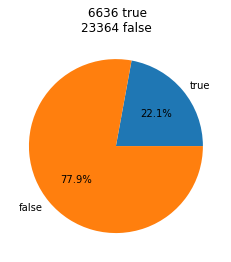

In [ ]:
number_of_true = cc['default.payment.next.month'].sum()
number_of_false = cc.shape[0] - number_of_true
print('number of true  :', number_of_true)
print('number of false :', number_of_false)
plt.pie([number_of_true, number_of_false], labels=['true', 'false'], autopct='%1.1f%%')
plt.title(' 6636 true\n23364 false')
plt.show()

In [ ]:
cc= pd.get_dummies(cc, columns=['SEX','EDUCATION','MARRIAGE'])
cc.head()

,ID,LIMIT_BAL,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,...,EDUCATION_1,EDUCATION_2,EDUCATION_3,EDUCATION_4,EDUCATION_5,EDUCATION_6,MARRIAGE_0,MARRIAGE_1,MARRIAGE_2,MARRIAGE_3
0,1,20000.0,24,2,2,-1,-1,-2,-2,3913.0,...,0,1,0,0,0,0,0,1,0,0
1,2,120000.0,26,-1,2,0,0,0,2,2682.0,...,0,1,0,0,0,0,0,0,1,0
2,3,90000.0,34,0,0,0,0,0,0,29239.0,...,0,1,0,0,0,0,0,0,1,0
3,4,50000.0,37,0,0,0,0,0,0,46990.0,...,0,1,0,0,0,0,0,1,0,0
4,5,50000.0,57,-1,0,-1,0,0,0,8617.0,...,0,1,0,0,0,0,0,1,0,0


In [ ]:
target_name='default.payment.next.month'
X= cc.drop('default.payment.next.month',axis=1)
robust_scaler=RobustScaler()
X=robust_scaler.fit_transform(X)
y=cc[target_name]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

In [ ]:
model_linear = LinearRegression()
model_linear.fit(X_train, y_train)
y_predict = model_linear.predict(X_train)
print("train MAE :\n", mean_absolute_error(y_train, y_predict))
print("\ntrain RMSE :\n", sqrt(mean_squared_error(y_train, y_predict)))
print("\ntrain R² :\n", r2_score(y_train, y_predict))
y_predict[y_predict < .5] = 0
y_predict[y_predict >= .5] = 1
print("\ntrain accuracy score :\n", accuracy_score(y_train, y_predict))
print("\ntrain confusion matrix :\n", confusion_matrix(y_train, y_predict))
y_predict = model_linear.predict(X_test)
print("\ntest MAE :\n", mean_absolute_error(y_test, y_predict))
print("\ntest RMSE :\n", sqrt(mean_squared_error(y_test, y_predict)))
print("\ntest R² :\n", r2_score(y_test, y_predict))
y_predict[y_predict < .5] = 0
y_predict[y_predict >= .5] = 1
print("\ntest accuracy score :\n", accuracy_score(y_test, y_predict))
print("\ntest confusion matrix :\n", confusion_matrix(y_test, y_predict))

train MAE :
 0.3086361532407057

train RMSE :
 0.38925246669974456

train R² :
 0.12621110601117913

train accuracy score :
 0.7995714285714286

train confusion matrix :
 [[16042   270]
 [ 3939   749]]

test MAE :
 0.3063616902304653

test RMSE :
 0.3862283835907427

test R² :
 0.12042650114108744

test accuracy score :
 0.8033333333333333

test confusion matrix :
 [[6925  127]
 [1643  305]]


In [ ]:
model_logistic = LogisticRegression(max_iter=1000)
model_logistic.fit(X_train, y_train)
y_predict = model_logistic.predict(X_train)
print("train accuracy score :\n", accuracy_score(y_train, y_predict))
print("\ntrain confusion matrix :\n", confusion_matrix(y_train, y_predict))
y_predict = model_logistic.predict(X_test)
print("\ntest accuracy score :\n", accuracy_score(y_test, y_predict))
print("\ntest confusion matrix :\n", confusion_matrix(y_test, y_predict))

train accuracy score :
 0.8111428571428572

train confusion matrix :
 [[15875   437]
 [ 3529  1159]]

test accuracy score :
 0.8136666666666666

test confusion matrix :
 [[6844  208]
 [1469  479]]


In [ ]:
model_svr = svm.SVR()
model_svr.fit(X_train, y_train)
y_predict = model_svr.predict(X_train)
print("train MAE :\n", mean_absolute_error(y_train, y_predict))
print("\ntrain RMSE :\n", sqrt(mean_squared_error(y_train, y_predict)))
print("\ntrain R² :\n", r2_score(y_train, y_predict))
y_predict[y_predict < .5] = 0
y_predict[y_predict >= .5] = 1
print("\ntrain accuracy score :\n", accuracy_score(y_train, y_predict))
print("\ntrain confusion matrix :\n", confusion_matrix(y_train, y_predict))
y_predict = model_svr.predict(X_test)
print("\ntest MAE :\n", mean_absolute_error(y_test, y_predict))
print("\ntest RMSE :\n", sqrt(mean_squared_error(y_test, y_predict)))
print("\ntest R² :\n", r2_score(y_test, y_predict))
y_predict[y_predict < .5] = 0
y_predict[y_predict >= .5] = 1
print("\ntest accuracy score :\n", accuracy_score(y_test, y_predict))
print("\ntest confusion matrix :\n", confusion_matrix(y_test, y_predict))

train MAE :
 0.24099756253859134

train RMSE :
 0.38027271001401386

train R² :
 0.16606136756825496

train accuracy score :
 0.8203809523809524

train confusion matrix :
 [[15665   647]
 [ 3125  1563]]

test MAE :
 0.24572092631756848

test RMSE :
 0.3833512937135889

test R² :
 0.13348191916790142

test accuracy score :
 0.8191111111111111

test confusion matrix :
 [[6745  307]
 [1321  627]]


In [ ]:
model_rf = RandomForestClassifier(n_estimators = 100, max_depth=3)
model_rf.fit(X_train, y_train)
y_predict = model_rf.predict(X_train)
print("train accuracy score :\n", accuracy_score(y_train, y_predict))
print("\ntrain confusion matrix :\n", confusion_matrix(y_train, y_predict))
y_predict = model_rf.predict(X_test)
print("\ntest accuracy score :\n", accuracy_score(y_test, y_predict))
print("\ntest confusion matrix :\n", confusion_matrix(y_test, y_predict))

train accuracy score :
 0.8079047619047619

train confusion matrix :
 [[15846   466]
 [ 3568  1120]]

test accuracy score :
 0.8077777777777778

test confusion matrix :
 [[6823  229]
 [1501  447]]


In [ ]:
tree = model_rf.estimators_[5]
export_graphviz(tree, out_file = 'tree4.dot', feature_names = cc.drop('default.payment.next.month',axis=1).columns, rounded = True, precision = 1)
(graph, ) = pydot.graph_from_dot_file('tree4.dot')
graph.write_png('tree4.png')

In [ ]:
model_rf = RandomForestClassifier(n_estimators = 100, max_depth=5)
model_rf.fit(X_train, y_train)
y_predict = model_rf.predict(X_train)
print("train accuracy score :\n", accuracy_score(y_train, y_predict))
print("\ntrain confusion matrix :\n", confusion_matrix(y_train, y_predict))
y_predict = model_rf.predict(X_test)
print("\ntest accuracy score :\n", accuracy_score(y_test, y_predict))
print("\ntest confusion matrix :\n", confusion_matrix(y_test, y_predict))

train accuracy score :
 0.816047619047619

train confusion matrix :
 [[15740   572]
 [ 3291  1397]]

test accuracy score :
 0.8144444444444444

test confusion matrix :
 [[6776  276]
 [1394  554]]


In [ ]:
model_rf = RandomForestClassifier(n_estimators = 100, max_depth=7)
model_rf.fit(X_train, y_train)
y_predict = model_rf.predict(X_train)
print("train accuracy score :\n", accuracy_score(y_train, y_predict))
print("\ntrain confusion matrix :\n", confusion_matrix(y_train, y_predict))
y_predict = model_rf.predict(X_test)
print("\ntest accuracy score :\n", accuracy_score(y_test, y_predict))
print("\ntest confusion matrix :\n", confusion_matrix(y_test, y_predict))

train accuracy score :
 0.8325238095238096

train confusion matrix :
 [[15696   616]
 [ 2901  1787]]

test accuracy score :
 0.8202222222222222

test confusion matrix :
 [[6692  360]
 [1258  690]]


In [ ]:
model_rf = RandomForestClassifier(n_estimators = 1000, max_depth=9)
model_rf.fit(X_train, y_train)
y_predict = model_rf.predict(X_train)
print("train accuracy score :\n", accuracy_score(y_train, y_predict))
print("\ntrain confusion matrix :\n", confusion_matrix(y_train, y_predict))
y_predict = model_rf.predict(X_test)
print("\ntest accuracy score :\n", accuracy_score(y_test, y_predict))
print("\ntest confusion matrix :\n", confusion_matrix(y_test, y_predict))

train accuracy score :
 0.8508571428571429

train confusion matrix :
 [[15860   452]
 [ 2680  2008]]

test accuracy score :
 0.8224444444444444

test confusion matrix :
 [[6698  354]
 [1244  704]]


In [ ]:
model_clf = MLPClassifier(solver='lbfgs', alpha=0.001, hidden_layer_sizes=(150, 50, 2), max_iter=50)
model_clf.fit(X_train, y_train)
model_clf.predict(X_test)
y_predict = model_clf.predict(X_train)
print("train accuracy score :\n", accuracy_score(y_train, y_predict))
print("\ntrain confusion matrix :\n", confusion_matrix(y_train, y_predict))
y_predict = model_clf.predict(X_test)
print("\ntest accuracy score :\n", accuracy_score(y_test, y_predict))
print("\ntest confusion matrix :\n", confusion_matrix(y_test, y_predict))

/opt/venv/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
train accuracy score :
 0.8239047619047619

train confusion matrix :
 [[15430   882]
 [ 2816  1872]]

test accuracy score :
 0.8183333333333334

test confusion matrix :
 [[6613  439]
 [1196  752]]


In [ ]:
y_train_dummies = np.array(pd.get_dummies(y_train).values)
y_test_dummies = np.array(pd.get_dummies(y_test).values)
model_NN = Sequential()
model_NN.add(Dense(units = 400, activation = 'relu'))
model_NN.add(Dense(units = 100, activation = 'relu'))
model_NN.add(Dense(units = 2, activation = 'softmax'))
model_NN.compile(optimizer = 'sgd', loss = "sparse_categorical_crossentropy")
print(y_train_dummies.shape)
model_NN.fit(X_train, y_train_dummies.T, epochs=5)
y_predict = model_NN.predict(X_train)
print("train accuracy score :\n", accuracy_score(y_train_dummies, y_predict))
print("\ntrain confusion matrix :\n", confusion_matrix(y_train_dummies, y_predict))
y_predict = model_NN.predict(X_test)
print("\ntest accuracy score :\n", accuracy_score(y_test_dummies, y_predict))
print("\ntest confusion matrix :\n", confusion_matrix(y_test_dummies, y_predict))

(21000, 2)


ValueError: Data cardinality is ambiguous:
  x sizes: 21000
  y sizes: 2
Make sure all arrays contain the same number of samples.